<table>
  <tr>
    <td><center><img src="img/mlhep-logo-transparent.png" width="400"></center></td>
    <td><h1><center>The Sixth Machine Learning in High Energy Physics Summer School (MLHEP) 2020</center></h1></td>
  </tr>
 </table>

<h1><center>Seminar</center></h1>
<h2><center>Quality metrics for regression and classification</center></h2>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import numpy.testing as np_testing
import matplotlib.pyplot as plt

# Part 1: Classification quality metrics

We will consider a range of classification quality metrics solving a classification problem using several classifiers. We will compare these classifiers and select the best one for a particular problem.

## Read Data

We are going to consider a dataset from a [UCI HTRU2](https://archive.ics.uci.edu/ml/datasets/HTRU2). 

	HTRU2 is a data set which describes a sample of pulsar candidates collected during the
	High Time Resolution Universe Survey (South). 
	
	Pulsars are a rare type of Neutron star that produce radio emission detectable here on
	Earth. They are of considerable scientific interest as probes of space-time, the inter-
	stellar medium, and states of matter (see [2] for more uses). 
	
	As pulsars rotate, their emission beam sweeps across the sky, and when this crosses
	our line of sight, produces a detectable pattern of broadband radio emission. As pulsars
	rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking
	for periodic radio signals with large radio telescopes.
	
	Each pulsar produces a slightly different emission pattern, which varies slightly with each
	rotation (see [2] for an introduction to pulsar astrophysics to find out why). Thus a 
	potential signal detection known as a 'candidate', is averaged over many rotations of the
	pulsar, as determined by the length of an observation. In the absence of additional info,
	each candidate could potentially describe a real pulsar. However in practice almost all
	detections are caused by radio frequency interference (RFI) and noise, making legitimate
	signals hard to find.
    
	The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639
	real pulsar examples. These examples have all been checked by human annotators. Each
	candidate is described by 8 continuous variables. The first four are simple statistics
	obtained from the integrated pulse profile (folded profile). This is an array of continuous
	variables that describe a longitude-resolved version of the signal that has been averaged
	in both time and frequency (see [3] for more details). The remaining four variables are
	similarly obtained from the DM-SNR curve (again see [3] for more details).

Dataset description:

* **MeanInt:** Mean of the integrated profile.
* **StdInt:** Standard deviation of the integrated profile.
* **ExcessInt:** Excess kurtosis of the integrated profile.
* **SkewnessInt:** Skewness of the integrated profile.
* **MeanDM:** Mean of the DM-SNR curve.
* **StdDM:** Standard deviation of the DM-SNR curve.
* **ExcessDM:** Excess kurtosis of the DM-SNR curve.
* **SkewnessDM:** Skewness of the DM-SNR curve.
* **Label:** The class labels used are 0 (negative) and 1 (positive).

In [2]:
# define column names
col_names = ['MeanInt', 'StdInt', 'ExcessInt', 'SkewnessInt', 
             'MeanDM', 'StdDM', 'ExcessDM', 'SkewnessDM', 'Label']

# read data
data = pd.read_csv('data/HTRU2/HTRU_2.csv', header=None, names=col_names)

In [3]:
data.head()

,MeanInt,StdInt,ExcessInt,SkewnessInt,MeanDM,StdDM,ExcessDM,SkewnessDM,Label
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


## Train / Test Split

In [4]:
# estimate Label column
label_col = data.columns == 'Label'

# Take all columns that are not Label
X = data.loc[:, ~label_col].values

# Take Label column
y = data.loc[:, label_col].values.flatten()

In [5]:
X[:2]

array([[140.5625    ,  55.68378214,  -0.23457141,  -0.6996484 ,
          3.19983278,  19.11042633,   7.97553179,  74.24222492],
       [102.5078125 ,  58.88243001,   0.46531815,  -0.51508791,
          1.67725752,  14.86014572,  10.57648674, 127.3935796 ]])

In [6]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [7]:
from sklearn.model_selection import train_test_split

# Split data into train and test samples
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

## Preprocessing

Scale input data using StandardScaler:
$$
X_{new} = \frac{X - \mu}{\sigma}
$$

In [8]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create object of the class and set up its parameters
ss = StandardScaler()

# Estimate mean and sigma values
ss.fit(X_train)

# Scale train and test samples
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

## Fit Classifiers

We will consider three classifiers:
* kNN
* Decision Tree
* Logistic Regression

We will use scikit-learn implementations of these classifiers. Their descriptions: [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


[Example:](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)
<center><img src="img/clfs.png" width="500"></center>

Let's just import them and fit.

In [9]:
# Import kNN classifier
from sklearn.neighbors import KNeighborsClassifier

# Create an object of the classifier's class
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [10]:
# Import Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create an object of the classifier's class
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, 
                            min_samples_split=2, min_samples_leaf=10, class_weight=None, random_state=11)

# Fit the classifier
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=11, splitter='best')

In [11]:
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# Create an object of the classifier's class
logreg = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, class_weight=None, solver='lbfgs', random_state=11)

# Fit the classifier
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=11, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Make Predictions

Make prediction of target **label**.

In [12]:
# kNN
y_test_knn = knn.predict(X_test)

# Decision Tree
y_test_dt = dt.predict(X_test)

# Logistic Regression
y_test_logreg = logreg.predict(X_test)

In [13]:
print("Truth  : ", y_test[:10])
print("kNN    : ", y_test_knn[:10])
print("DT     : ", y_test_dt[:10])
print("LogReg : ", y_test_logreg[:10])

Truth  :  [0 1 0 1 0 0 0 0 0 0]
kNN    :  [0 1 0 1 0 0 0 0 0 0]
DT     :  [0 1 0 1 0 0 0 0 0 0]
LogReg :  [0 1 0 1 0 0 0 0 0 0]


Make prediction of **probability** of the positive class.

In [14]:
# kNN
y_test_proba_knn = knn.predict_proba(X_test)[:, 1] # probability of positive response

# Decision Tree
y_test_proba_dt = dt.predict_proba(X_test)[:, 1]

# Logistic Regression
y_test_proba_logreg = logreg.predict_proba(X_test)[:, 1]

In [15]:
print("Truth  : ", y_test[:10])
print("kNN    : ", y_test_proba_knn[:10])
print("DT     : ", y_test_proba_dt[:10])
print("LogReg : ", y_test_proba_logreg[:10])

Truth  :  [0 1 0 1 0 0 0 0 0 0]
kNN    :  [0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
DT     :  [0.  1.  0.  1.  0.  0.  0.2 0.  0.  0.2]
LogReg :  [7.23297632e-03 9.91909509e-01 2.63422040e-02 9.99673561e-01
 2.57153347e-04 2.57576493e-03 3.49650172e-03 9.97284912e-03
 3.59248585e-03 3.42034324e-02]


## Label-based Quality Metrics

Consider a confusion matrix:

<center><img src='img/binary_conf.png'></center>

* TP (true positive) - currectly predicted positives
* FP (false positive) - incorrectly predicted negatives (1st order error)
* FN (false negative) - incorrectly predicted positives (2nd order error)
* TN (true negative) - currectly predicted negatives
* Pos (Neg) - total number of positives (negatives)

Quality metrics:

* $ \text{Accuracy} = \frac{TP + TN}{Pos+Neg}$
* $ \text{Error rate} = 1 -\text{accuracy}$
* $ \text{Precision} =\frac{TP}{TP + FP}$ 
* $ \text{Recall} =\frac{TP}{TP + FN} = \frac{TP}{Pos}$
* $ \text{F}_\beta \text{-score} = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$

### Task 1
Complete a function that computes TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall and F1-score metrics for a classifier.

**Hint:** use implementation of the metrics from `sklearn.metrics` as it is shown below. Example for confusin matrix: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def quality_metrics_report(y_true, y_pred):
    """
    Parameters
    ----------
    y_true: array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_pred: array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
        
    Returns
    -------
    List of metric values: [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]
    """
    
    ### BEGIN SOLUTION
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    accuracy = accuracy_score(y_true, y_pred)
    error_rate = 1 - accuracy
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    ### END SOLUTION
    
    return [tp, fp, fn, tn, accuracy, error_rate, precision, recall, f1]

In [17]:
quality_metrics_report([0, 1, 0, 1], [1, 1, 1, 0])

[1, 2, 1, 0, 0.25, 0.75, 0.3333333333333333, 0.5, 0.4]

Expected output:

<center>   
    
```python
[1, 2, 1, 0, 0.25, 0.75, 0.3333333333333333, 0.5, 0.4]
    
``` 
    
</center>

In [18]:
### BEGIN HIDDEN TESTS
actual  = quality_metrics_report([0, 1, 0, 1], [1, 1, 1, 0])
desired = [1, 2, 1, 0, 0.25, 0.75, 0.3333333333333333, 0.5, 0.4]
np_testing.assert_almost_equal(actual, desired, decimal=1)
### END HIDDEN TESTS

Now let's compute all these quality metrics for all classifiers considered above.

In [19]:
metrics_report = pd.DataFrame(columns=['TP', 'FP', 'FN', 'TN', 'Accuracy', 'Error rate', 'Precision', 'Recall', 'F1'])

metrics_report.loc['kNN', :] = quality_metrics_report(y_test, y_test_knn)
metrics_report.loc['DT', :] = quality_metrics_report(y_test, y_test_dt)
metrics_report.loc['LogReg', :] = quality_metrics_report(y_test, y_test_logreg)

metrics_report

,TP,FP,FN,TN,Accuracy,Error rate,Precision,Recall,F1
kNN,689,62,130,8068,0.978545,0.0214549,0.917443,0.84127,0.877707
DT,706,90,113,8040,0.977316,0.0226841,0.886935,0.862027,0.874303
LogReg,677,49,142,8081,0.978657,0.0213432,0.932507,0.826618,0.876375


## Probability-based Quality Metrics

### ROC curve

The receiver operating characteristic curve (ROC) measures how well a classifier separates two classes. 

Let $y_{\rm i}$ is a true label and $\hat{y}_{\rm i}$ is a predicted score for the $i^{\rm th}$ observation. 

The numbers of positive and negative observations: $\mathcal{I}_{\rm 1} = \{i: y_{\rm i}=1\}$ and $\mathcal{I}_{\rm 0} = \{i: y_{\rm i}=0\}$. 

The sum of observation weights for each class: $W_{\rm 1} = \sum_{i \in \mathcal{I}_{\rm 1}} w_{\rm i}$ and  $W_{\rm 0} = \sum_{i \in \mathcal{I}_{\rm 0}} w_{\rm i}$. 

For each predicted score threshold value $\tau$, True Positive Rate (TPR) and False Positive Rate (FPR) are calculated:

\begin{equation}
TPR(\tau) = \frac{1}{W_{\rm 1}} \sum_{i \in \mathcal{I}_{\rm 1}} I[\hat{y}_{\rm i} \ge \tau] w_{\rm i}
\end{equation}

\begin{equation}
FPR(\tau) = \frac{1}{W_{\rm 0}} \sum_{i \in \mathcal{I}_{\rm 0}} I[\hat{y}_{\rm i} \ge \tau] w_{\rm i}
\end{equation}

### Task 2
Complete the fucntion below, that computes a ROC curve and ROC AUC for a classifier.

**Hint:** use `roc_curve` and `auc` from `from sklearn.metrics`.

In [20]:
from sklearn.metrics import roc_curve, auc

def roc_curve_report(y_true, y_proba):
    """
    Parameters
    ----------
    y_true: array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_proba: array-like of shape (n_samples,)
        Predicted probabilities of the positive class predicted by a classifier.
        
    Returns
    -------
    fpr : array, shape = [>2]
        Increasing false positive rates such that element i is the false
        positive rate of predictions with score >= thresholds[i].
    tpr : array, shape = [>2]
        Increasing true positive rates such that element i is the true
        positive rate of predictions with score >= thresholds[i].
    roc_auc : float
        Area under the ROC curve defined by the fpr and tpr.
    """
    
    ### BEGIN SOLUTION
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    roc_auc      = auc(fpr, tpr)
    ### END SOLUTION
    
    return fpr, tpr, roc_auc

In [21]:
roc_curve_report([0, 1, 0, 1], [0.6, 0.9, 0.1, 0.4])

(array([0. , 0. , 0.5, 0.5, 1. ]), array([0. , 0.5, 0.5, 1. , 1. ]), 0.75)

Expected output:

<center>   
    
```python
(array([0. , 0. , 0.5, 0.5, 1. ]), array([0. , 0.5, 0.5, 1. , 1. ]), 0.75)
    
``` 
    
</center>

In [22]:
### BEGIN HIDDEN TESTS
actual  = roc_curve_report([0, 1, 0, 1], [0.6, 0.9, 0.1, 0.4])[0]
desired = np.array([0. , 0. , 0.5, 0.5, 1. ])
np_testing.assert_almost_equal(actual, desired, decimal=1)
### END HIDDEN TESTS

Now let's plot ROC curves for all classifiers considered above.

In [23]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, auc_knn          = roc_curve_report(y_test, y_test_proba_knn)
fpr_dt, tpr_dt, auc_dt             = roc_curve_report(y_test, y_test_proba_dt)
fpr_logreg, tpr_logreg, auc_logreg = roc_curve_report(y_test, y_test_proba_logreg)

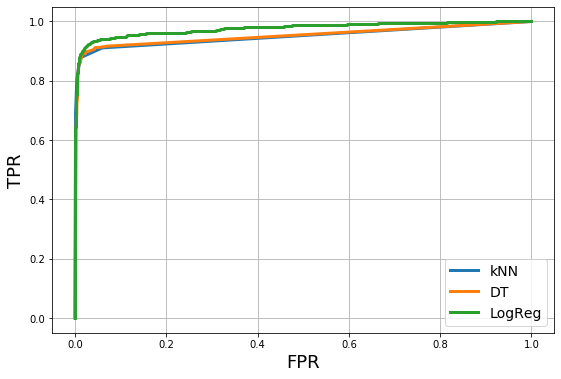

kNN ROC AUC    : 0.950121424291166
DT ROC AUC     : 0.9518132543962801
LogReg ROC AUC : 0.9771436981769085


In [24]:
plt.figure(figsize=(9, 6))
plt.plot(fpr_knn, tpr_knn, linewidth=3, label='kNN')
plt.plot(fpr_dt, tpr_dt, linewidth=3, label='DT')
plt.plot(fpr_logreg, tpr_logreg, linewidth=3, label='LogReg')

plt.xlabel('FPR', size=18)
plt.ylabel('TPR', size=18)

plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

print('kNN ROC AUC    :', auc_knn)
print('DT ROC AUC     :', auc_dt)
print('LogReg ROC AUC :', auc_logreg)

### Precision-Recall curve

The same idea as for ROC curve.

In [25]:
from sklearn.metrics import precision_recall_curve, auc

precision_knn, recall_knn, _ = precision_recall_curve(y_test, y_test_proba_knn)
#auc_knn = auc(fpr_knn, tpr_knn)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_test_proba_dt)
#auc_dt = auc(fpr_dt, tpr_dt)

precision_logreg, recall_logreg, _ = precision_recall_curve(y_test, y_test_proba_logreg)
#auc_logreg = auc(fpr_logreg, tpr_logreg)

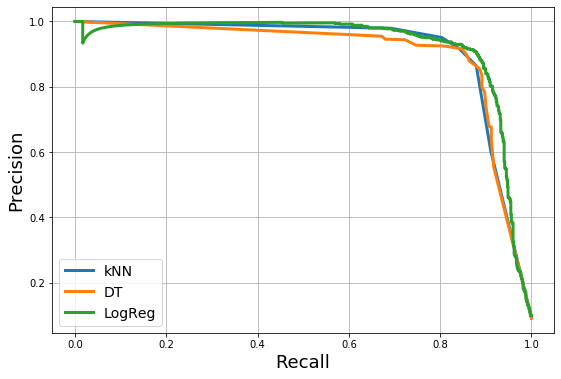

In [26]:
plt.figure(figsize=(9, 6))
plt.plot(recall_knn, precision_knn, linewidth=3, label='kNN')
plt.plot(recall_dt, precision_dt, linewidth=3, label='DT')
plt.plot(recall_logreg, precision_logreg, linewidth=3, label='LogReg')

plt.xlabel('Recall', size=18)
plt.ylabel('Precision', size=18)

plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

**Questions**:
* Which classifier is better?
* How can you improve the quality of these models?

---

# Part 2: Regression Quality Metrics

## Create Data

In [27]:
# Create the dataset
X = np.linspace(0, 6, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + np.random.RandomState(1).normal(0, 0.1, X.shape[0]) + 3

In [28]:
X[:5]

array([[0.        ],
       [0.03015075],
       [0.06030151],
       [0.09045226],
       [0.12060302]])

In [29]:
y[:5]

array([3.16243454, 3.14888995, 3.36141453, 3.49949366, 3.86895208])

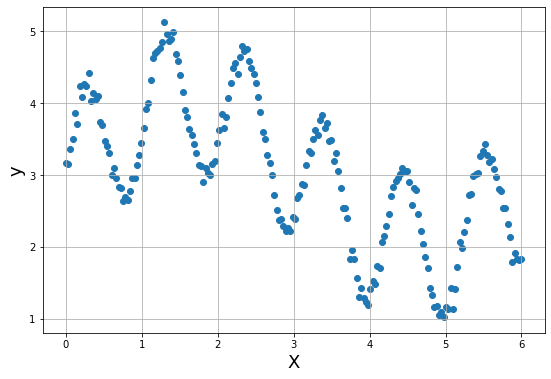

In [30]:
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], y)

plt.xlabel('X', size=18)
plt.ylabel('y', size=18)
plt.grid(b=1)
plt.show()

## Train / Test Split

In [31]:
from sklearn.model_selection import train_test_split

# Split data into train and test samples
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Fit Regressors

You have learnt three regressors:
* kNN
* Decision Tree
* Linear Regression

We will use scikit-learn implementation of these regressors. Their descriptions: [kNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html), [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html), [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Let's just import them and fit.

In [32]:
# Import kNN regressor
from sklearn.neighbors import KNeighborsRegressor

# Create object of the regressor's class
knn_reg = KNeighborsRegressor(n_neighbors=10)

# Fit the regressor
knn_reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [33]:
# Import Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

# Create object of the regressor's class
dt_reg = DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=4, 
                            min_samples_split=2, min_samples_leaf=1, random_state=11)

# Fit the regressor
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=11, splitter='best')

In [34]:
# Import Linear Regression regressor
from sklearn.linear_model import LinearRegression

# Create object of the regressor's class
linreg = LinearRegression()

# Fit the regressor
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Make Predictions

In [35]:
# kNN
y_test_knn_reg = knn_reg.predict(X_test)

# DT
y_test_dt_reg = dt_reg.predict(X_test)

# LinReg
y_test_linreg = linreg.predict(X_test)

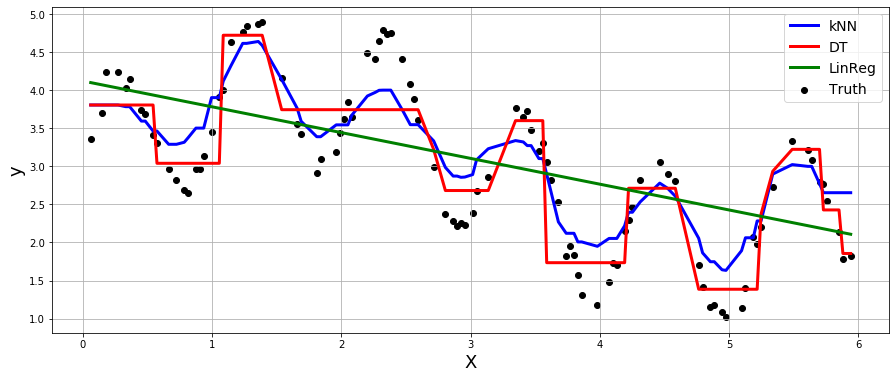

In [36]:
plt.figure(figsize=(15, 6))
plt.scatter(X_test[:, 0], y_test, color='0', label='Truth')

sortd_inds = np.argsort(X_test[:, 0])
plt.plot(X_test[sortd_inds, 0], y_test_knn_reg[sortd_inds], linewidth=3, color='b', label='kNN')
plt.plot(X_test[sortd_inds, 0], y_test_dt_reg[sortd_inds], linewidth=3, color='r', label='DT')
plt.plot(X_test[sortd_inds, 0], y_test_linreg[sortd_inds], linewidth=3, color='g', label='LinReg')

plt.xlabel('X', size=18)
plt.ylabel('y', size=18)
plt.legend(loc='best', fontsize=14)
plt.grid(b=1)
plt.show()

**Questions**:
* How can you explain behavior of the regressors?
* What will happen if one changes their hyperparameters?

## Quality Metrics

**1. (R)MSE ((Root) Mean Squared Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_{n=1}^N (y_n - \hat{y}_n)^2$$

**2. MAE (Mean Absolute Error)**

$$ L(\hat{y}, y) = \frac{1}{N}\sum\limits_{n=1}^N |y_n - \hat{y}_n|$$

**3. RSE (Relative Squared Error)**

$$ L(\hat{y}, y) = \sqrt\frac{\sum\limits_{n=1}^N (y_n - \hat{y}_n)^2}{\sum\limits_{n=1}^N (y_n - \bar{y})^2}$$

**4. RAE (Relative Absolute Error)**

$$ L(\hat{y}, y) = \frac{\sum\limits_{n=1}^N |y_n - \hat{y}_n|}{\sum\limits_{n=1}^N |y_n - \bar{y}|}$$

**5. MAPE (Mean Absolute Persentage Error)**

$$ L(\hat{y}, y) = \frac{100}{N} \sum\limits_{n=1}^N\left|\frac{ y_n - \hat{y}_n}{y_n}\right|$$


**6. RMSLE (Root Mean Squared Logarithmic Error)**

$$ L(\hat{y}, y) = \sqrt{\frac{1}{N}\sum\limits_{n=1}^N(\log(y_n + 1) - \log(\hat{y}_n + 1))^2}$$

### Task 3
Complete the function below that computes mse, mae, rse, rae, mape, rmsle metrics for a regressor.

In [37]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

def regression_quality_metrics_report(y_true, y_pred):
    """
    Parameters
    ----------
    y_true: array-like of shape (n_samples,)
        Ground truth (correct) target values.
    y_pred: array-like of shape (n_samples,)
        Estimated targets as returned by a regressor.
        
    Returns
    -------
    List of metric values: [rmse, mae, rse, rae, mape, rmsle]
    """
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    rmse  = np.sqrt( mean_squared_error(y_true, y_pred) )
    mae   = mean_absolute_error(y_true, y_pred)
    rmsle = np.sqrt( mean_squared_log_error(y_true, y_pred) )
    
    ### BEGIN SOLUTION
    rse  = np.sqrt( ( (y_true - y_pred)**2 ).sum() / ( (y_true - y_true.mean())**2 ).sum() )
    rae  = np.abs( y_true - y_pred ).sum() / np.abs( y_true - y_true.mean() ).sum()
    mape = 100. / len(y_true) * np.abs( 1. - y_pred/y_true ).sum()
    ### END SOLUTION
    
    return [rmse, mae, rse, rae, mape, rmsle]

In [38]:
regression_quality_metrics_report(y_test, y_test_linreg)

[0.8076899021597924,
 0.6851055642060055,
 0.785078577131241,
 0.8107258374023686,
 29.634749024687267,
 0.22301402015722577]

Expected output:

<center>   
    
```python
[0.8076899021597924,
 0.6851055642060055,
 0.785078577131241,
 0.8107258374023686,
 29.634749024687267,
 0.22301402015722577]
    
``` 
    
</center>

In [39]:
### BEGIN HIDDEN TESTS
actual  = regression_quality_metrics_report(y_test, y_test_linreg)
desired = [0.8076899021597924, 0.6851055642060055, 0.785078577131241, 0.8107258374023686, 
           29.634749024687267, 0.22301402015722577]
np_testing.assert_almost_equal(actual, desired, decimal=1)
### END HIDDEN TESTS

Now let's compute all these metrics for all regressors considered above.

In [40]:
metrics_report = pd.DataFrame(columns=['RMSE', 'MAE', 'RSE', 'RAE', 'MAPE', 'RMSLE'])

metrics_report.loc['kNN', :] = regression_quality_metrics_report(y_test, y_test_knn_reg)
metrics_report.loc['DT', :] = regression_quality_metrics_report(y_test, y_test_dt_reg)
metrics_report.loc['LinReg', :] = regression_quality_metrics_report(y_test, y_test_linreg)

metrics_report

,RMSE,MAE,RSE,RAE,MAPE,RMSLE
kNN,0.421235,0.357068,0.409443,0.42254,15.3816,0.121781
DT,0.42662,0.326301,0.414677,0.386131,11.9148,0.112371
LinReg,0.80769,0.685106,0.785079,0.810726,29.6347,0.223014


**Questions**:
* Which regressor is better?
* How can you improve the quality of these models??